# 2D Classification with a Single Neuron

We'll implement a script to classify 2D data using a single neuron.

## Load Data

We implement the function `load_data()`, add it to `loader.py` ...

```python
def load_data(filename):
    import csv
    from numpy import asarray, reshape
    
    with open(filename) as f:
        reader = csv.reader(f)
        header = next(reader)
        data = []
        for row in reader:
            data.append(row)
        data = asarray(data).astype(float)

    x = data[:, 0:-1] # input data

    num_samples = data.shape[0]
    y = reshape(data[:, -1], (num_samples, 1)) # output data/targets/groundtruth
    
    return (x, y)
```

... and use it to load the data.

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_class_2d_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[ 1.13210319 -1.4066463 ]
 [-1.09042665  1.92715243]
 [-0.76551909 -0.14404298]
 [ 0.12162179 -0.78994452]
 [-0.47511814 -1.61110253]
 [ 0.22451311  0.54315986]
 [-0.2498135   0.0686202 ]
 [ 0.95858174  1.26612468]
 [ 1.94770422  0.88129908]
 [-0.23942295  0.49355215]
 [-0.86684561  0.32131904]
 [-0.23114367  1.44038263]
 [-0.40099583 -0.26931807]
 [ 1.35830369  0.1398443 ]
 [-1.50464579 -0.58452625]
 [ 0.15401177  1.41957166]
 [ 1.18233301 -0.05716118]
 [ 0.48304064 -1.01761707]
 [ 0.19611033 -2.0721155 ]
 [-0.54700911 -0.15378581]]
y_gt: [[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]


## Visualize Data

We implement the function `plot_data_2d()` and save it in `plotting.py`.

```python
def plot_data_1d(x, y_gt):
    import matplotlib.pyplot as plt

    plt.scatter(x, y_gt, s=20, c="k")
    plt.axis("equal")
    plt.xlabel("x0", fontsize=24)
    plt.ylabel("y", fontsize=24)
    plt.tick_params(axis="both", which="major", labelsize=16)
    plt.show()
```

We now use this function to visualize the data.


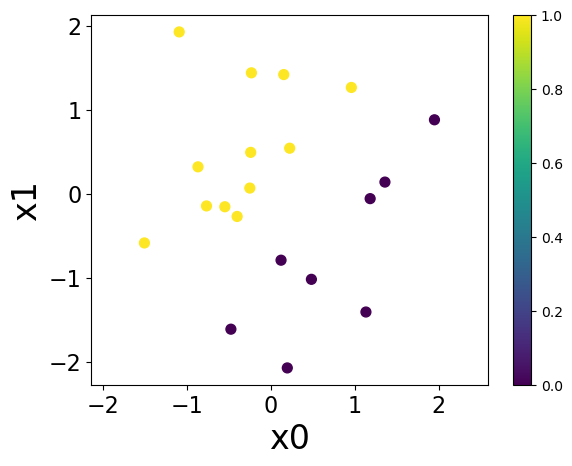

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Neuron

We now create a single neuron and randomly initialize it.

In [5]:
from numpy.random import default_rng

rng = default_rng()
w0 = rng.standard_normal()
w1 = rng.standard_normal()

def neuron2d(w0, w1, x):
    x0 = x[:, 0]
    x1 = x[:, 1]
    return (x0 * w0 + x1 * w1 > 0).astype(int)

y_p = neuron2d(w0, w1, x)

We now plot its predictions using the function `plot_pred_2d`, which we also add to `plotting.py`.

```python
def plot_pred_2d(x, y_gt, y_p):
    import matplotlib.pyplot as plt

    plt.scatter(x[:, 0], x[:, 1], c=y_gt, s=50, label="ground truth")
    plt.colorbar()
    plt.scatter(x[:, 0], x[:, 1], c=y_p, s=100, marker="x", label="predicted")
    plt.legend(fontsize=20)
    plt.axis("equal")
    plt.xlabel("x0", fontsize=24)
    plt.ylabel("x1", fontsize=24)
    plt.tick_params(axis="both", which="major", labelsize=16)
    plt.show()
```


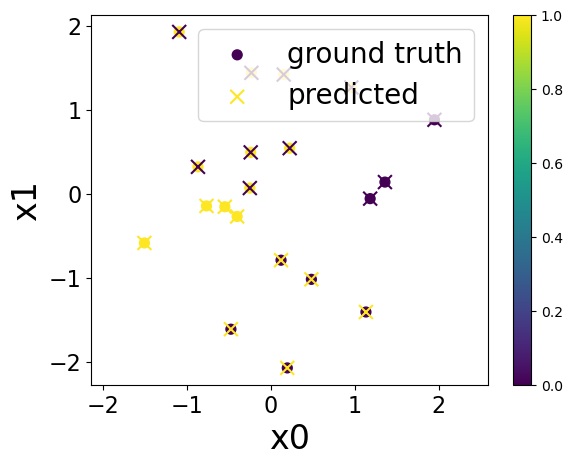

In [8]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=neuron2d(w0, w1, x))

## Training

We now train the neuron...

In [ ]:
num_samples = len(x)
num_train_iterations = 100
eta = .1 # learning rate

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples) # select random sample
    x0_selected = x[selected]
    y_gt_selected = y_gt[selected]

    y_p = neuron(w0, x0_selected) # neuron prediction

    error = y_p_selected - y_gt_selected # calculate error
    # update weights
    w0 -= eta * error * x0_selected
 print(f"iteration {i}\t w0 = {w0:.2f}\t error = {error:.2f}")